# 정성엽

# Vegetable Image Set을 활용한 여러가지 CNN 기법
- 담당 CNN기법: ALexNet
## ALexNet 논문을 바탕으로 모델 구축
## 그러나 Computing power 한계로 인해 변경

- AlexNet이란?
1. 2012년에 개최된 ILSVRC 대회의 우승을 차지한 컨볼루션 신경망 구조
2. CNN의 부흥에 아주 큰 역할을 한 구조
3. AlexNet의 기본 구조는 LeNet-5와 크게 다르지 않음.
4. 2개의 GPU로 병렬연산을 수행하기 위해서 병렬구조로 설계되었다는 점이 가장 큰 변화임.
5. 학습에는 GPU를 사용했으며, 성능 향상과 학습 시간 단축을 이루어냈고, 과적합을 방지하기 위해 여러 기술들을 도입함. <- 드롭아웃

AlexNet에 입력 되는 것은 227 x 227 x 3 이미지입니다. 이는 227 x 227 사이즈의 RGB 컬러 이미지를 뜻한다.
5개의 컨볼루션 레이어와 3개의 full-connected 레이어로 구성 되어있다.   
Convolution layer는 특징 추출을 하고 Fully-connected layer에서는 분류가 이루어진다.

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "../input/vegetable-image-dataset/Vegetable Images/train"
validation_path = "../input/vegetable-image-dataset/Vegetable Images/validation"
test_path = "../input/vegetable-image-dataset/Vegetable Images/test"

In [ ]:
from matplotlib import image
from PIL import Image

def Load_Images(path):
    folders=os.listdir(path)
    data = []
    label = []
    print(folders)
    for i in folders:
        c=0
        images=os.listdir(path + '/' + i)
        for j in images:
            c+=1
            im=Image.open(path + '/' + i + '/' + j).convert('RGB')
            im=im.resize((227,227), image.NEAREST)
            #print(im.size)
            ar=np.array(im)
            #print(ar.shape)
            data.append(ar)
            if i=='Bean':
                label.append(i)
            elif i=='Bitter_Gourd':
                label.append(i)
            elif i=='Bottle':
                label.append(i)
            elif i=='Brinjal':
                label.append(i)
            elif i=='Broccoli':
                label.append(i)
            elif i=='Cabbage':
                label.append(i)
            elif i=='Capsicum':
                label.append(i)
            elif i=='Carrot':
                label.append(i)
            elif i=='Cauliflower':
                label.append(i)
            elif i=='Cucumber':
                label.append(i)
            elif i=='Papaya':
                label.append(i)
            elif i=='Potato':
                label.append(i)
            elif i=='Pumpkin':
                label.append(i)
            elif i=='Radish':
                label.append(i)
            else:
                label.append(i)
            #label.append(i)
            #print(c)
    t=pd.factorize(np.array(label))
    print(t)
    tgt=t[0]
    return np.array(data), tgt

In [ ]:
x_train, y_train = Load_Images(train_path)
y_train = pd.Series(y_train)
print(x_train.shape)

['Broccoli', 'Capsicum', 'Bottle_Gourd', 'Radish', 'Tomato', 'Brinjal', 'Pumpkin', 'Carrot', 'Papaya', 'Cabbage', 'Bitter_Gourd', 'Cauliflower', 'Bean', 'Cucumber', 'Potato']
(array([ 0,  0,  0, ..., 14, 14, 14]), array(['Broccoli', 'Capsicum', 'Bottle_Gourd', 'Radish', 'Tomato',
       'Brinjal', 'Pumpkin', 'Carrot', 'Papaya', 'Cabbage',
       'Bitter_Gourd', 'Cauliflower', 'Bean', 'Cucumber', 'Potato'],
      dtype=object))
(15000, 227, 227, 3)


In [ ]:
x_valid, y_valid = Load_Images(validation_path)
y_valid = pd.Series(y_valid)
print(x_valid.shape)

['Broccoli', 'Capsicum', 'Bottle_Gourd', 'Radish', 'Tomato', 'Brinjal', 'Pumpkin', 'Carrot', 'Papaya', 'Cabbage', 'Bitter_Gourd', 'Cauliflower', 'Bean', 'Cucumber', 'Potato']
(array([ 0,  0,  0, ..., 14, 14, 14]), array(['Broccoli', 'Capsicum', 'Bottle_Gourd', 'Radish', 'Tomato',
       'Brinjal', 'Pumpkin', 'Carrot', 'Papaya', 'Cabbage',
       'Bitter_Gourd', 'Cauliflower', 'Bean', 'Cucumber', 'Potato'],
      dtype=object))
(3000, 227, 227, 3)


In [ ]:
name_list = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
index = 0
for i in name_list:
    y_train = y_train.replace(i, index)
    y_valid = y_valid.replace(i, index)
    index += 1

In [ ]:
x_test, y_test = Load_Images(test_path)
y_test = pd.Series(y_test)
y_test = y_test.replace("Bean", 0)
y_test = y_test.replace("Bitter_Gourd", 1)
y_test = y_test.replace("Bottle_Gourd", 2)
y_test = y_test.replace("Brinjal", 3)
y_test = y_test.replace("Broccoli", 4)
y_test = y_test.replace("Cabbage", 5)
y_test = y_test.replace("Capsicum", 6)
y_test = y_test.replace("Carrot", 7)
y_test = y_test.replace("Cauliflower", 8)
y_test = y_test.replace("Cucumber", 9)
y_test = y_test.replace("Papaya", 10)
y_test = y_test.replace("Potato", 11)
y_test = y_test.replace("Pumpkin", 12)
y_test = y_test.replace("Radish", 13)
y_test = y_test.replace("Tomato", 14)

['Broccoli', 'Capsicum', 'Bottle_Gourd', 'Radish', 'Tomato', 'Brinjal', 'Pumpkin', 'Carrot', 'Papaya', 'Cabbage', 'Bitter_Gourd', 'Cauliflower', 'Bean', 'Cucumber', 'Potato']
(array([ 0,  0,  0, ..., 14, 14, 14]), array(['Broccoli', 'Capsicum', 'Bottle_Gourd', 'Radish', 'Tomato',
       'Brinjal', 'Pumpkin', 'Carrot', 'Papaya', 'Cabbage',
       'Bitter_Gourd', 'Cauliflower', 'Bean', 'Cucumber', 'Potato'],
      dtype=object))


In [ ]:
# # 1. Train Set

# # rescale: 0과 1사이로 값을 변경함
# # ImageDataGenerator: 데이터 증식(augmentation)
# # ImageDataGenerator는 Noise삽입, 색상, 밝기 변형 등을 활용하여 실시간으로 데이터 증강을 사용하고, 
# # 텐서 이미지 데이터 배치를 생성하여 데이터 학습의 정확도를 높이는 역할을 한다.

# train_gen = ImageDataGenerator(rescale = 1./255.0) # Normalise the data

# # flow() 또는 flow_from_directory() 또는 flow_from_dataframe() 함수로 Numpy Array Iterator 객체를 만들어줌. 
# # 이 때, X(image) array, Y(label) array, 배치 사이즈, 데이터 셔플 유무를 설정.

# # 메타 데이터:  이미지 데이터 파일(jpg, jpeg)들과 해당 이미지들이 무슨 이미지를 나타내는지 텍스트로 표현한 문자열(cat, dog와 같은 문자열들)
# # flow_from_directory(): 메타 데이터가 담긴 디렉토리
# # target_size : 추후에 설계할 모델에 들어갈 인풋 이미지 사이즈 중 Width, Height를 입력
# # batch_size : 이미지 데이터 원본 소스에서 한 번에 얼마만큼의 이미지 데이터를 가져올 것인지
# # class_mode
# #    'categorical' : 'categorical_crossentropy' 처럼 멀티-레이블 클래스인데, 원-핫 인코딩된 형태
# #    'sparse' : 'sparse_categorical_crossentropy' 처럼 멀티-레이블 클래스인데, 레이블 인코딩된 형태
# #    'binary' : 'binary_crossentropy' 처럼 이진 분류 클래스로, 0 또는 1인 형태

# train_image_generator = train_gen.flow_from_directory(
#                                             train_path,
#                                             target_size=(224, 224),
#                                             batch_size=32,
#                                             class_mode='categorical')

# # 2. Validation Set
# val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
# val_image_generator = train_gen.flow_from_directory(
#                                             validation_path,
#                                             target_size=(224, 224),
#                                             batch_size=32,
#                                             class_mode='categorical')

# # 3. Test Set
# test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
# test_image_generator = train_gen.flow_from_directory(
#                                             test_path,
#                                             target_size=(224, 224),
#                                             batch_size=32,
#                                             class_mode='categorical')

In [ ]:
# from keras.preprocessing import image
# # Call the function
# image_categories = os.listdir('../input/vegetable-image-dataset/Vegetable Images/train')

# def plot_images(image_categories):
#     # Create a figure
#     plt.figure(figsize=(12, 12))
#     for i, cat in enumerate(image_categories):
#         # Load images for the ith category
#         image_path = train_path + '/' + cat
#         images_in_folder = os.listdir(image_path)
#         first_image_of_folder = images_in_folder[0]
#         first_image_path = image_path + '/' + first_image_of_folder
#         img = image.load_img(first_image_path)
#         img_arr = image.img_to_array(img)/255.0

#         # Create Subplot and plot the images
#         plt.subplot(4, 4, i+1)
#         plt.imshow(img_arr)
#         plt.title(cat)
#         plt.axis('off')

#     plt.show()

# # Call the function
# plot_images(image_categories)

In [ ]:
# from keras.models import Sequential 
# from keras.layers import Conv2D,Dense, Flatten, AveragePooling2D, Dropout 
# model = Sequential()

# model.add(Conv2D(6, kernel_size=(3, 3), activation='tanh', input_shape=x_train.shape[1:]))
# model.add(AveragePooling2D())
# Dropout(0.2)

# model.add(Conv2D(32, kernel_size=(3,3), activation='tanh'))
# model.add(AveragePooling2D())

# model.add(Conv2D(64, kernel_size=(3,3),activation='tanh'))

# model.add(Flatten())

# model.add(Dense(15, activation = 'softmax'))
# model.summary()

In [ ]:
import tensorflow as tf
# validation loss가 낮아지지 않는 경우 종료 시키기 위해 콜백 함수를 활용 
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) # 3번 연속으로 validation loss가 낮아지지 않는 경우 종료

파라미터 설정으로는  
Input shape을 227x227x3으로 해주었고
Optimizer은 adam  
Epochs는 30  
Loss는 Scc로 해주었다.

In [ ]:
from keras.models import Sequential 
from keras.layers import Input,Conv2D, Dense, Flatten, MaxPooling2D, Dropout, BatchNormalization, Activation, ZeroPadding2D
model = Sequential()

# 논문을 바탕으로 모델 구축함.
# modeling
# input_shape = (227, 227, 3)  # 논문에서 제시된 shape

img_shape = x_train.shape[1:]

# CONV
# 레이어 1
model.add(Conv2D(filters=96, kernel_size=11, activation='relu', strides=4, padding='same',input_shape=img_shape))
model.add(MaxPooling2D((3,3), strides=2)) # overlapped pooling
model.add(BatchNormalization())

# 96개의 11 x 11 x 3 사이즈 커널로 입력 영상을 컨볼루션해준다.
# 컨볼루션 보폭(stride)를 4로 설정했고, zero-padding은 사용하지 않았다
# 결과적으로 55 x 55 x 96 특성맵이 됨. 그 다음에 ReLU 함수로 활성화해준다.
# 이어서 3 x 3 overlapping max pooling이 stride 2로 시행함. 그 결과 27 x 27 x 96 특성맵을 갖게 된다.
# 그 다음에는 수렴 속도를 높이기 위해 local response normalization이 시행된다. local response normalization은 특성맵의 차원을 변화시키지 않으므로, 특성맵의 크기는 27 x 27 x 96으로 유지된다.

# 레이어 2
model.add(Conv2D(filters=256, kernel_size=5, activation='relu', strides=1, padding='same'))
model.add(MaxPooling2D((3,3), strides=2))
model.add(BatchNormalization())

# 256개의 5 x 5 x 48 커널을 2번 사용하여 전 단계의 특성맵을 컨볼루션해준다. stride는 1로 따라서 27 x 27 x 256 특성맵을 얻게 된다. 
# 역시 ReLU 함수로 활성화한다.
# 3 x 3 overlapping max pooling을 stride 2로 시행한다. 그 결과 13 x 13 x 256 특성맵을 얻게 된다.
# 그 후 local response normalization이 시행되고, 특성맵의 크기는 13 x 13 x 256으로 그대로 유지된다.

# 레이어 3
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=384, kernel_size=3, activation='relu', strides=1, padding='same'))

# 384개의 3 x 3 x 256 커널을 사용하여 전 단계의 특성맵을 컨볼루션해준다. 
# stride와 zero-padding 모두 1로 설정한다. 따라서 13 x 13 x 384 특성맵을 얻게 된다.
# 역시 ReLU 함수로 활성화한다.

# 레이어 4
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=384, kernel_size=3, activation='relu', strides=1, padding='same'))

# 192개의 3 x 3 x 192 커널을 각 GPU 채널당 1번씩 2번 사용해서 전 단계의 특성맵을 컨볼루션해준다.
# stride와 zero-padding 모두 1로 설정한다. 따라서 13 x 13 x 384 특성맵을 얻게 된다.
# 역시 ReLU 함수로 활성화한다.

# 레이어 5
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu', strides=1, padding='same'))
model.add(MaxPooling2D((3,3), strides=2))

# 256개의 3 x 3 x 192 커널을 각 GPU 채널당 1번씩 2번 사용해서 전 단계의 특성맵을 컨볼루션해준다.
# stride와 zero-padding 모두 1로 설정한다. 따라서 13 x 13 x 256 특성맵(256장의 13 x 13 사이즈 특성맵들)을 얻게 된다.
# 역시 ReLU 함수로 활성화한다.
# 그 다음에 3 x 3 overlapping max pooling을 stride 2로 시행한다. 그 결과 6 x 6 x 256 특성맵을 얻게 된다.

# FC
# 레이어 6
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))  # 논문 parameter 0.5 이용함.

# 6 x 6 x 256 특성맵을 flatten해줘서 6 x 6 x 256 = 9216 개의 1차원 벡터로 만들어준다.
# 그것을 여섯번째 레이어의 4096개의 뉴런과 fully connected 해준다.(각 GPU 채널당 2048개)
# 그 결과를 ReLU 함수로 활성화한다.

# 레이어 7
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# 레이어 7도 마찬가지이다.

# 레이어 8
model.add(Dense(1000, activation='softmax'))
model.summary()

# 레이어 8은 1000개의 뉴런으로 구성되어 있다. 전 단계의 4096개 뉴런과 fully connected되어 있는 모습을 확인할 수 있다.
# 1000개 뉴런의 출력값에 softmax 함수를 적용했다.


2022-12-09 12:11:59.843581: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 12:11:59.844490: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 12:12:00.106804: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 12:12:00.107700: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-09 12:12:00.108519: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 57, 57, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 256)       1024      
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 15, 15, 256)       0

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
history = model.fit(x_train, y_train, epochs=30,  validation_data=(x_valid, y_valid))

2022-12-09 12:12:05.311859: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2318805000 exceeds 10% of free system memory.
2022-12-09 12:12:08.079055: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2318805000 exceeds 10% of free system memory.
2022-12-09 12:12:10.082487: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-12-09 12:12:12.755900: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


469/469 [==============================] - ETA: 0s - loss: 1.8781 - accuracy: 0.4412

2022-12-09 12:12:53.442415: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 463761000 exceeds 10% of free system memory.
2022-12-09 12:12:53.989837: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 463761000 exceeds 10% of free system memory.


469/469 [==============================] - 46s 66ms/step - loss: 1.8781 - accuracy: 0.4412 - val_loss: 1.3297 - val_accuracy: 0.5950
Epoch 2/30
469/469 [==============================] - 29s 62ms/step - loss: 0.9656 - accuracy: 0.6995 - val_loss: 0.9516 - val_accuracy: 0.7093
Epoch 3/30
469/469 [==============================] - 29s 62ms/step - loss: 0.6937 - accuracy: 0.7923 - val_loss: 0.9679 - val_accuracy: 0.7310
Epoch 4/30
469/469 [==============================] - 30s 64ms/step - loss: 0.5599 - accuracy: 0.8365 - val_loss: 0.6026 - val_accuracy: 0.8207
Epoch 5/30
469/469 [==============================] - 30s 64ms/step - loss: 0.4465 - accuracy: 0.8704 - val_loss: 0.3489 - val_accuracy: 0.8923
Epoch 6/30
469/469 [==============================] - 30s 63ms/step - loss: 0.4053 - accuracy: 0.8833 - val_loss: 0.5436 - val_accuracy: 0.8507
Epoch 7/30
469/469 [==============================] - 30s 64ms/step - loss: 0.3573 - accuracy: 0.9011 - val_loss: 0.5020 - val_accuracy: 0.8623
Epo

In [ ]:
# hist = model.fit(train_image_generator, 
#                  epochs=20, 
#                  verbose=1, 
#                  validation_data=val_image_generator, 
#                  steps_per_epoch = 15000//24, 
#                  validation_steps = 3000//24)

# h = hist.history
# plt.style.use('ggplot')
# plt.figure(figsize=(10, 5))
# plt.plot(h['loss'], c='red', label='Training Loss')
# plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
# plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
# plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
# plt.xlabel("Number of Epochs")
# plt.legend(loc='best')
# plt.show()

# model.evaluate(test_image_generator)

In [ ]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,1.878110,0.441200,1.329731,0.595000
1,0.965616,0.699467,0.951630,0.709333
2,0.693680,0.792267,0.967931,0.731000
3,0.559937,0.836533,0.602583,0.820667
4,0.446545,0.870400,0.348940,0.892333
5,0.405291,0.883267,0.543565,0.850667
6,0.357348,0.901133,0.501955,0.862333
7,0.351276,0.903800,0.423151,0.883333
8,0.325422,0.913400,0.355472,0.906333
9,0.272641,0.927200,0.919857,0.828333


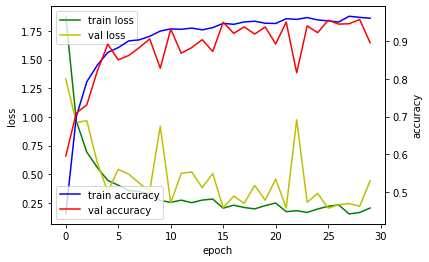

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'g', label = 'train loss')
loss_ax.plot(history.history['val_loss'], 'y', label = 'val loss')

acc_ax.plot(history.history['accuracy'], 'b', label = 'train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'r', label = 'val accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')


loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()

# Epoch 30와 60을 비교 
# 30 같은 경우는 정확도 90.13%이었는데
# 60 으로 했을때는 95.0%로 더 오른 것을 확인할 수 있었다.

In [ ]:
acc = model.evaluate(x_train, y_train)
print(acc)

2022-12-09 12:27:33.201475: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2318805000 exceeds 10% of free system memory.


469/469 [==============================] - 8s 16ms/step - loss: 0.2395 - accuracy: 0.9379
[0.2394511103630066, 0.9378666877746582]


In [ ]:
y_pred=model.predict(x_test)
len(y_pred)

3000

In [ ]:
def acc(_test, _y):
    Tp = 0
    Negative = 0
    cnt = 0
    for num in _test:
        if np.argmax(num) == _y[cnt]:
            Tp += 1
        else:
            Negative +=1
        cnt += 1
    print("맞춘 갯수: ", Tp)
    print("틀린 갯수: ", Negative)
    print("정확도: ", Tp/(Tp+Negative)*100, "%")

In [ ]:
acc(y_pred, y_test)

맞춘 갯수:  2704
틀린 갯수:  296
정확도:  90.13333333333333 %


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = -1)

accuracy_score(y_test, y_pred)
# Test 데이터 90.16%라는 높은 정확률, ROC커브 그래프를 확인할 수 있었다.

0.9013333333333333

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# confustion matrix(y_test, y_pred)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.99      0.83      0.91       200\n           1       0.97      0.92      0.94       200\n           2       0.90      0.99      0.95       200\n           3       0.85      0.96      0.90       200\n           4       0.86      0.81      0.83       200\n           5       0.93      0.94      0.94       200\n           6       0.85      0.85      0.85       200\n           7       0.83      0.97      0.90       200\n           8       0.99      0.94      0.97       200\n           9       0.94      0.76      0.84       200\n          10       0.99      0.84      0.91       200\n          11       0.94      0.85      0.90       200\n          12       0.70      0.95      0.81       200\n          13       0.94      0.92      0.93       200\n          14       0.95      0.95      0.95       200\n\n    accuracy                           0.90      3000\n   macro avg       0.91      0.90      0.90      3000\nweigh

In [ ]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0,1],[0,1],color='green',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic Curve")
    plt.legend()
    plt.show()

[[[[122 101 100]
   [134 113 112]
   [149 128 127]
   ...
   [121 201 190]
   [175 205 213]
   [227 203 229]]

  [[149 128 127]
   [153 132 131]
   [150 129 128]
   ...
   [107 183 173]
   [166 205 210]
   [208 203 223]]

  [[159 138 137]
   [153 132 131]
   [140 119 118]
   ...
   [ 94 161 154]
   [151 201 202]
   [182 211 219]]

  ...

  [[161 155 159]
   [162 154 152]
   [163 152 146]
   ...
   [109  91  87]
   [128 110 108]
   [137 119 117]]

  [[156 156 158]
   [160 154 158]
   [165 150 153]
   ...
   [109  94  89]
   [122 108 105]
   [131 120 116]]

  [[154 158 159]
   [160 155 161]
   [167 150 158]
   ...
   [109  94  89]
   [119 108 104]
   [135 126 121]]]


 [[[186 186 194]
   [186 186 194]
   [188 188 196]
   ...
   [ 97 100 109]
   [ 97 100 107]
   [ 95 100 106]]

  [[185 185 193]
   [186 186 194]
   [187 187 195]
   ...
   [ 97 100 109]
   [ 97 100 107]
   [ 95 100 106]]

  [[185 185 193]
   [186 186 194]
   [187 187 195]
   ...
   [ 97 100 109]
   [ 97 100 107]
   [ 96  99

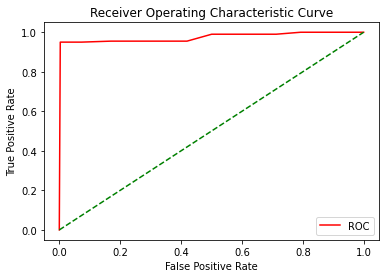

In [ ]:
from sklearn.metrics import roc_curve

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)
print(x_test, y_pred)
fper, tper, thresholds = roc_curve(y_test, y_pred, pos_label=14)
plot_roc_curve(fper, tper)

In [ ]:
classes = list(x_test)
test_classes = [classes[x] for x in y_test]

pred = tf.argmax(model.predict(x_test),axis=1)
pred_classes = [classes[x] for x in pred]

In [ ]:
from sklearn.metrics import confusion_matrix
prediction = confusion_matrix(y_test, y_pred)

Text(114.0, 0.5, 'Predict')

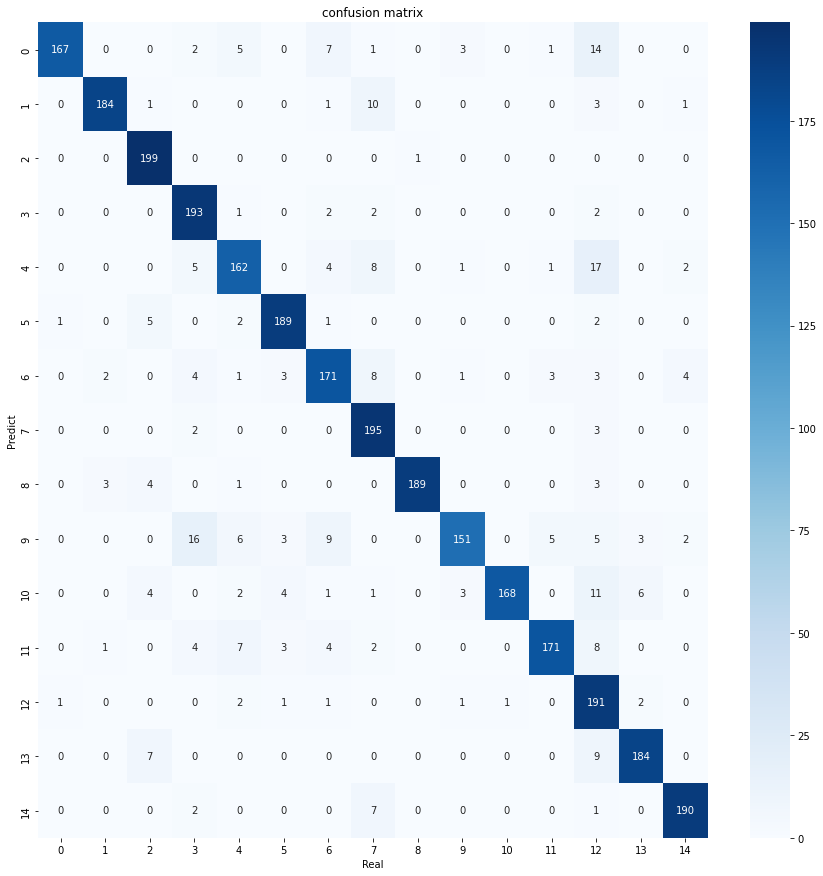

In [ ]:
import seaborn as sns
m = pd.DataFrame(prediction, index=[i for i in range(len(prediction[0]))], columns = [i for i in range(len(prediction[0]))])
plt.figure(figsize=(15,15))
plt.title("confusion matrix")
cnn_matric = sns.heatmap(m, annot=True, fmt='d', cmap='Blues')
cnn_matric.set_xlabel('Real')
cnn_matric.set_ylabel('Predict')

# 에포크 30, 60 confusion matrix를 비교했지만, 확실히 60이 더 좋은 결과를 낸 것을 확인할 수 있었다.